### LAB 2
### Name: Jonathan Reyes
### COSC 3337

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

### The dataset 'heart', is used to predict the presence or absence of heart disease based on several input features. The following is description of each feature.
 - Sex: male or female (0 is female and 1 is male)
 - Age: Age of the patient;
 - cp: Chest Pain type: Between 0 to 3
 - trestbps: Resting Blood Pressure (in mm Hg) : The blood pressure of the patient when they are at rest.
 - Chol: Serum Cholesterol (in mg/dl):Blood cholesterol levels
 - fbs: Fasting Blood Sugar. Whether the person has high fasting blood sugar levels >120mg/dl (1=T or 0=F)
 - restecg: Resting Electrocardiographic Results (0=Normal, 1=ST Wave Abnormality, 2=left ventricular hypertrophy)
 - thalach: Maximum Heart Rate Achieved: The maximum heart rate achieved during exercise stress testing.
 - exang: Exercise Induced Angina. Whether or not the person experienced angina (chest pain) during exercise (1 = Yes, 0 = No).
 - oldpeak: Depression Induced by Exercise Relative to Rest
 - slope: Slope of the Peak Exercise ST Segment (0=Upsloping, 1=Flat, 2=Downsloping)
 - ca: Number of Major Vessels Colored by Fluoroscopy (The number of major blood vessels 0 to 4 that are colored by fluoroscopy)
 - thal: Thalassemia A blood disorder that affects the shape of red blood cells. The values typically are ( 3=Normal, 6=Fixed defect,
 7=Reversible defect. If any other value don't worry about it)
 - Target: (0= No heart disease (healthy) 1= Heart disease present (diseased))

In [2]:
# Load the dataset (you'll need to provide the actual path to your data)
# For demonstration, I'll assume the path is 'heart.csv'
data = pd.read_csv('lab2_dataset.csv')

 ### 1. Identify what are the data types of each column (Nominal vs Continous). (14 points)

### Write your answer here
- Sex: Male or Female: ?
- Age: ?
- cp: ?
- trestbps: ?
- Chol: ?
- fbs: ?
- restecg: ?
- thalach: ?
- exang: ?
- oldpeak: ?
- slope: ?
- ca: ? (number of blood vessels)
- thal: ?
- Target: ?

###  2. Create a correlation heatmap of the data. Set annot to true to check the values. (4 points)

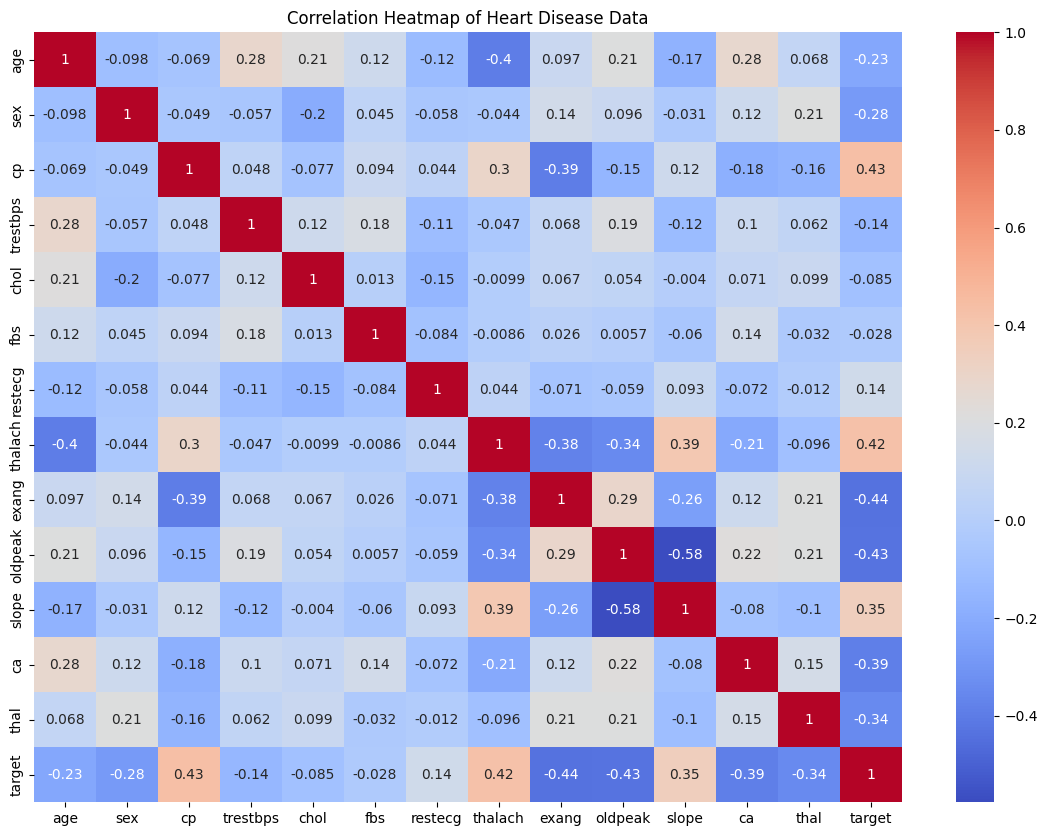

In [3]:
# Question 2: Create a correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Heart Disease Data')
plt.show()

### 3. According to the heatmap, do you think some of the feature should not be count in the logistic regression? Which ones? How do you know? (Hint: Find the corrrelated pairs first and choose items with strong (around 0.4) correlation). (10 points)

###  4. How many null values are there in each feature?(4 points)

In [4]:
# Question 4: Check for null values in each feature
null_values = data.isnull().sum()
print("Null values in each feature:")
print(null_values)

Null values in each feature:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 5. Show the histogram of each factors and comment on the distribution of some of them. (5 points)

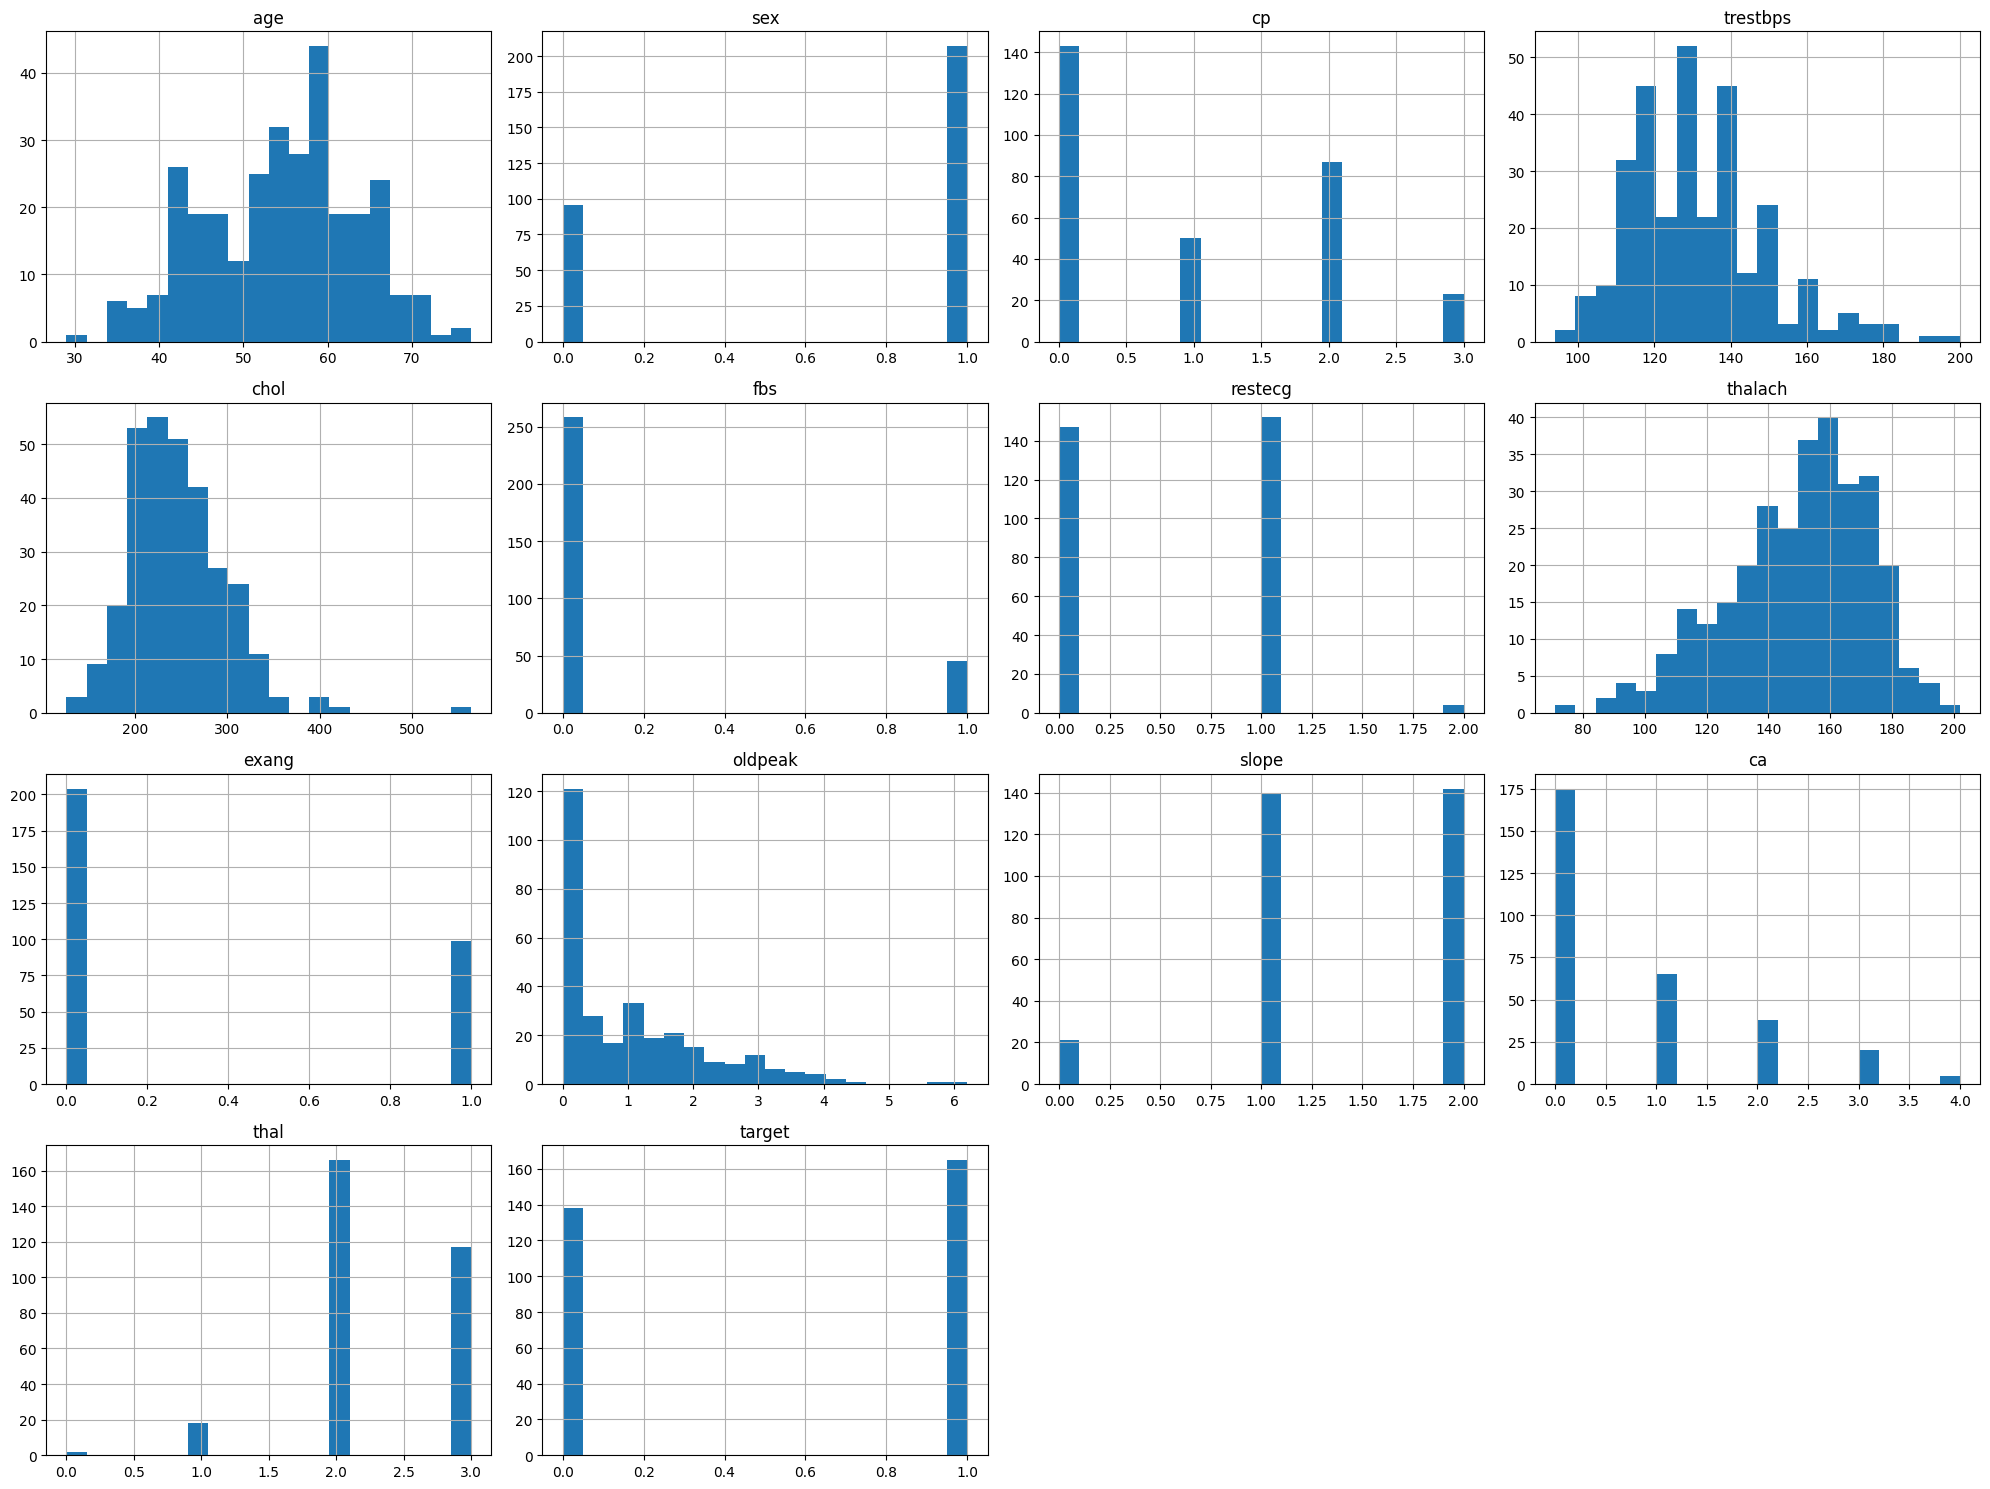

In [5]:
# Question 5: Show histogram of each factor
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    data[column].hist(bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()

###  6. Split the data set into X (features) and y. The features to use are age, sex, cp, thalach, slope and restecg. (6 points)

In [6]:
# Question 6: Split the data into X and y
features = ['age', 'sex', 'cp', 'thalach', 'slope', 'restecg']
X = data[features]
y = data['target']


###  7. Plot K Neighbors Classifier Scores for different K values: Perform 5-fold cross-validation to evaluate the model's performance for upto 50 neighbors. Then plot the results. Which K value gives the highest cross-validation score? (10 points)

In [7]:
# Question 7: Plot K Neighbors Classifier Scores for different K values
k_range = range(1, 51)
k_scores = []

In [8]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

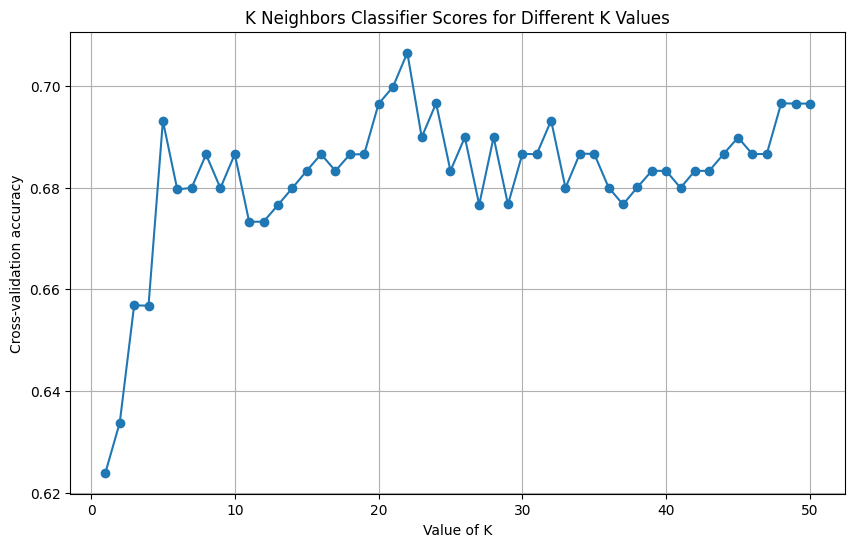

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K')
plt.ylabel('Cross-validation accuracy')
plt.title('K Neighbors Classifier Scores for Different K Values')
plt.grid(True)
plt.show()

In [10]:
# Find K with highest cross-validation score
best_k = k_range[k_scores.index(max(k_scores))]
print(f"The K value with the highest cross-validation score is: {best_k}")

The K value with the highest cross-validation score is: 22


### 8. Find the Average cross validation score for 11 neighbours. Hint use .mean() for average. (6 points)

In [11]:
# Question 8: Find the Average cross validation score for 11 neighbors
knn_11 = KNeighborsClassifier(n_neighbors=11)
scores_11 = cross_val_score(knn_11, X, y, cv=5, scoring='accuracy')
avg_score_11 = scores_11.mean()
print(f"Average cross-validation score for 11 neighbors: {avg_score_11:.4f}")

Average cross-validation score for 11 neighbors: 0.6733


###  9. Split the dataset into X_train, X_test, y_train and y_test. Split using 70% training and 30% test set. Use random state = 5. Then train the classifier. Then predict y using this. (6 points)

In [12]:
# Question 9: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [13]:
# Train the classifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict y using the classifier
y_pred = knn.predict(X_test)

###  10. Find the accuracy, precision and recall upto 4 decimal places. Explain what each of these mean. (15 points).

In [14]:
# Question 10: Find accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8132
Precision: 0.8444
Recall: 0.7917


 ### 11. Given a 50 year old male who has chest pain type 3, maximum heart rate 222, and UpSloping ST Segment (slope=0) and resting ecg
 having LVT (restecg=2), predict if the person has a chance of developing heart disease.

In [15]:
# Question 11: Predict for the first real-life example
example1 = np.array([50, 1, 3, 222, 0, 2]).reshape(1, -1)
prediction1 = knn.predict(example1)
print(f"Prediction for the first real-life example: {prediction1[0]}")
print(f"This person {'has' if prediction1[0] == 1 else 'does not have'} a chance of developing heart disease.")


Prediction for the first real-life example: 1
This person has a chance of developing heart disease.


###  12. Given a 63 year old female who has chest pain type 1, maximum heart rate 100, and Downsloping ST Segment (slope=2) and a normal resting ecg (restecg=0), predict if the person has a chance of developing heart disease.

In [16]:
# Question 12: Predict for the second real-life example
example2 = np.array([63, 0, 1, 100, 2, 0]).reshape(1, -1)
prediction2 = knn.predict(example2)
print(f"Prediction for the second real-life example: {prediction2[0]}")
print(f"This person {'has' if prediction2[0] == 1 else 'does not have'} a chance of developing heart disease.")

Prediction for the second real-life example: 0
This person does not have a chance of developing heart disease.
